### User defined KNN

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

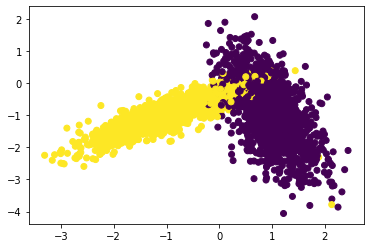

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [92]:
def CV_func(X_train,y_train,folds):
    data_X=[]
    data_Y=[]
    j=0
    #split=len(X_train)//folds
    for i in range(1,folds+1):
        split=len(X_train)//folds
        split*=i
        data_X.append(X_train[j:split])
        data_Y.append(y_train[j:split])
        j=split
        #print(split)
    return data_X,data_Y

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):

    params=random.sample(range(param_range[0],param_range[1]), 10)
    params=sorted(params)
    trainscores = []
    testscores  = []    


    data_X,data_Y=CV_func(X_train,y_train,folds)

    for k in params:
        trainscores_folds = []
        testscores_folds  = []
        
        lst=[i for i in range(folds)]
        #print(lst)
        lst1=[(i,j) for i in lst for j in  lst if i!=j ]
        lst2=[]
        #print(lst1)

        for i in lst:
            n=[x for x in lst if x!=i]
            #print(n)
            #[(0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]--error
            dx=[data_X[j] for j in n]
            dy=[data_Y[j] for j in n]
            X_tr=[]
            Y_tr=[]
            X_cv=[]
            Y_cv=[]
            for d_x,d_y in zip(dx,dy):
                X_tr.extend(d_x)
                Y_tr.extend(d_y)
                X_cv=data_X[i]
                Y_cv=data_Y[i]


            classifier.n_neighbors = k
            classifier.fit(X_tr,Y_tr)

            Y_predicted = classifier.predict(X_cv)
            testscores_folds.append(accuracy_score(Y_cv, Y_predicted))

            Y_predicted = classifier.predict(X_tr)
            trainscores_folds.append(accuracy_score(Y_tr, Y_predicted))

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params


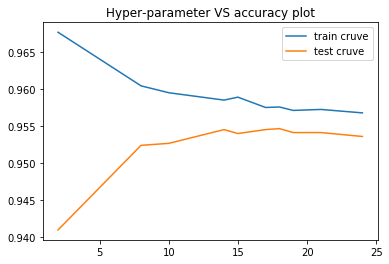

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

#params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
params=(2,25)
folds = 3

trainscores,testscores,params = RandomSearchCV(X_train, y_train, neigh, params, folds)
 

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [79]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

## Considering k=19

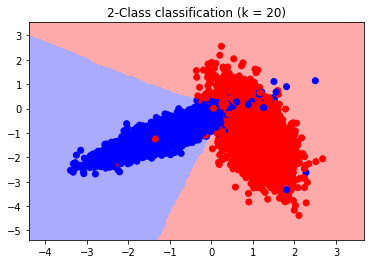

In [84]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 20)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)